In [1]:
import json
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
def get_results(train=True):
    global filenames
    filenames = sorted([f for f in os.listdir(os.getcwd()+'./results/') if not f.endswith('checkpoints')])
    for filename in filenames:
        if train:
            with open('./results/'+ filename,'r') as f: yield filename, json.load(f)
        else:
            with open('./results_test/'+ filename,'r') as f: yield filename, json.load(f)

In [3]:
def mk_dataframe(results_train, results_test):
    assert results_train[0]==results_test[0]
    filename, results_train = results_train
    _, results_test = results_test
    #del results_test['dev']['total_acc']
    #del results_test['test']['total_acc']
    #del results_test['dev']['exec_acc']
    #del results_test['test']['exec_acc']
    results_test.update(results_train)
    print("Model: ", filename.strip('.json'))
    return pd.DataFrame.from_dict(results_test, orient='index')

In [4]:
def show_plots(metric, idx):
    folder = 'losses/' if metric == 'loss' else 'accs/'
    filename = './plots/' + folder + os.listdir(os.getcwd() + './plots/' + folder)[idx]  
    print("Model: ", re.sub(r'./plots/' + folder, '', filename.replace('.png', '')))
    image = img.imread(filename)
    plt.clf()
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show()

In [5]:
results_train = get_results()
results_test = get_results(train=False)

In [6]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_pos_types_single_kg


,max,agg,sel,where,total_acc,exec_acc
dev,0.548630,0.898792,0.873430,0.678789,NaN,NaN
test,NaN,0.897213,0.863331,0.572324,0.470678,0.566181
train,0.968558,0.988703,0.999124,0.973063,NaN,NaN


In [7]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_types_single_kg


,max,agg,sel,where,total_acc,exec_acc
dev,0.545161,0.900108,0.865654,0.679986,NaN,NaN
test,NaN,0.898797,0.853325,0.669854,0.545092,0.616719
train,0.956636,0.984717,0.998945,0.972384,NaN,NaN


In [8]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_pos_types_single_kg


,max,agg,sel,where,total_acc,exec_acc
dev,0.548152,0.899629,0.877019,0.678430,NaN,NaN
test,NaN,0.897657,0.861875,0.553515,0.456745,0.564471
train,0.963178,0.987649,0.999142,0.973134,NaN,NaN


In [9]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_types_single_kg


,max,agg,sel,where,total_acc,exec_acc
dev,0.536428,0.899270,0.868046,0.673286,NaN,NaN
test,NaN,0.898417,0.854908,0.666751,0.546105,0.619569
train,0.959514,0.990151,0.999035,0.969953,NaN,NaN


In [10]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_pos_types_single_kg


,max,agg,sel,where,total_acc,exec_acc
dev,0.651900,0.899406,0.931235,0.779929,NaN,NaN
test,NaN,0.898218,0.913964,0.334635,0.282673,0.428292
train,0.968804,0.988271,0.998758,0.979771,NaN,NaN


In [11]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_types_single_kg


,max,agg,sel,where,total_acc,exec_acc
dev,0.648100,0.896437,0.926247,0.777316,NaN,NaN
test,NaN,0.897273,0.912074,0.766644,0.648233,0.713485
train,0.962487,0.983036,0.998651,0.978919,NaN,NaN


Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

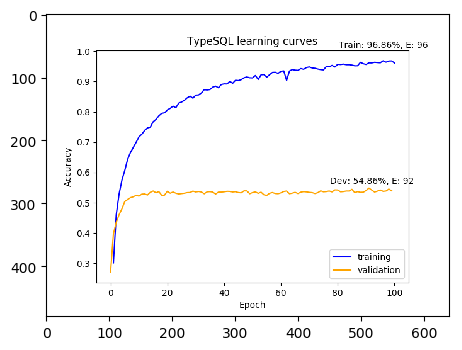

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

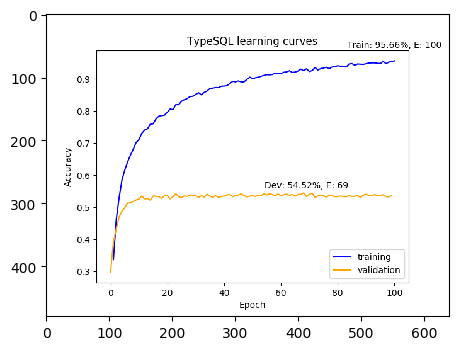

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

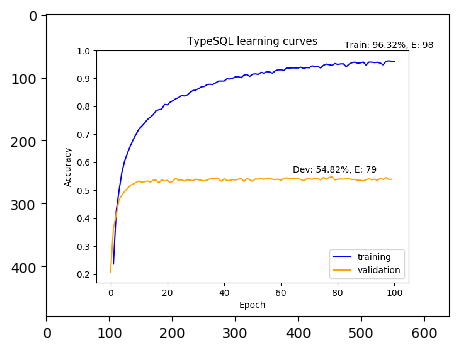

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

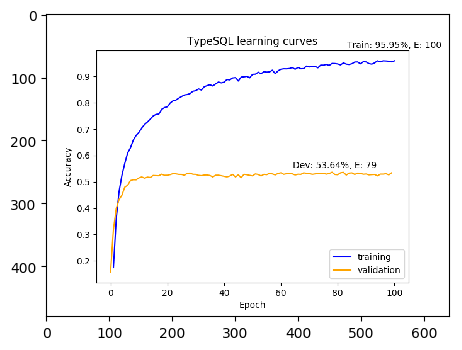

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

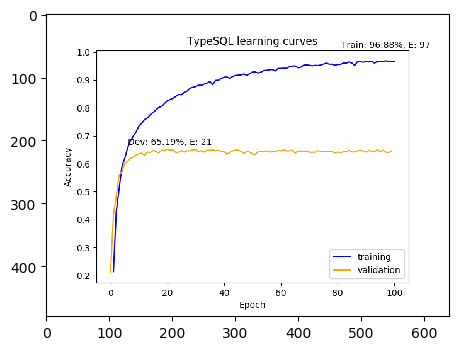

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

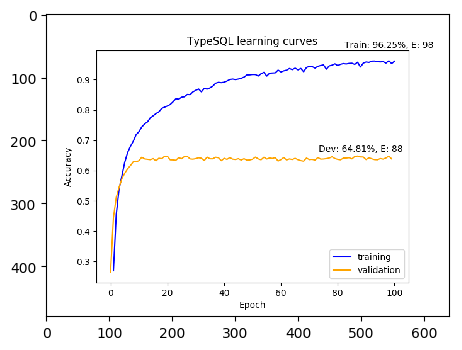

In [12]:
for i in range(len(filenames)):
    show_plots('acc', i)

In [13]:
#for i in range(len(filenames)):
#    show_plots('loss', i)